# Recommender Project

## 1. Data Prep

In [29]:
# import the restaurant ratings data (first tab of spreadsheet)
import pandas as pd

restaurant_ratings = pd.read_excel('../Data/Restaurant_Ratings.xlsx', sheet_name='restaurant_ratings')
restaurant_ratings.head()

,Consumer_ID,Restaurant_ID,Restaurant_Name,Overall_Rating
0,U1077,135085,Tortas Locas Hipocampo,2
1,U1077,135038,Restaurant La Chalita,2
2,U1077,132825,Puesto De Tacos,2
3,U1077,135060,Restaurante Marisco Sam,1
4,U1068,135104,Vips,1


In [30]:
# view the range of the ratings
restaurant_ratings['Overall_Rating'].describe()

count    1161.000000
mean        1.199828
std         0.773282
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Overall_Rating, dtype: float64

In [31]:
# pivot the data to get it into a user-item matrix format (think about how you'd like to deal with the NaN values)
user_item_df = (restaurant_ratings.pivot(index='Consumer_ID', columns = 'Restaurant_Name', values = 'Overall_Rating').fillna(restaurant_ratings['Overall_Rating'].mean()))
user_item_df

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
Consumer_ID,,,,,,,,,,,,,,,,,,,,,
U1001,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,0.000000,1.199828,1.199828,1.199828
U1002,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.000000,1.199828,1.199828,1.199828
U1003,1.199828,1.199828,2.000000,1.199828,1.199828,2.000000,1.199828,1.199828,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828
U1004,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,2.000000,1.199828,1.199828,...,1.199828,1.199828,1.199828,2.000000,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828
U1005,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,2.000000,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U1134,1.199828,1.199828,2.000000,1.199828,0.000000,1.199828,1.199828,1.199828,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,2.000000,1.199828,1.199828,1.199828
U1135,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,0.000000,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,0.000000,1.199828,0.000000,1.199828
U1136,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,...,1.199828,1.199828,1.199828,2.000000,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828


In [32]:
# check the number of rows and columns in the data
user_item_df.shape

(138, 127)

## 2. Collaborative Filtering: Recommend Restaurants to a New User

### a. Fit an initial TruncatedSVD model with all the components on centered data

In [33]:
# center the data
user_item_centered= user_item_df - user_item_df.mean()
user_item_centered.head()

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
Consumer_ID,,,,,,,,,,,,,,,,,,,,,
U1001,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-1.234655,0.021733,0.034765,0.02026
U1002,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.234655,0.021733,0.034765,0.02026
U1003,0.060855,0.004344,0.775518,0.013038,0.02172,0.772629,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.034828,0.021733,0.034765,0.02026
U1004,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.804485,-0.011603,0.001442,...,0.021733,0.005792,0.004344,0.779875,0.033323,-0.002902,-0.034828,0.021733,0.034765,0.02026
U1005,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.804485,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.034828,0.021733,0.034765,0.02026


In [34]:
# fit a TruncatedSVD model with 127 components
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=127)
svd.fit(user_item_centered)


,n_components,127
,algorithm,'randomized'
,n_iter,5
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None
,tol,0.0


In [35]:
# view the cumulative explained variance ratios
import numpy as np

np.cumsum(svd.explained_variance_ratio_)

array([0.09789976, 0.14684295, 0.18473654, 0.22017871, 0.2527808 ,
       0.28286941, 0.31119036, 0.33765646, 0.36306473, 0.38800345,
       0.41190876, 0.43391369, 0.45440807, 0.47386805, 0.49279632,
       0.51099733, 0.52909844, 0.54627   , 0.56296799, 0.57846447,
       0.5936018 , 0.60791945, 0.6216511 , 0.63473571, 0.64751598,
       0.66003602, 0.67199036, 0.683857  , 0.69519197, 0.70634568,
       0.71717614, 0.72763736, 0.73772757, 0.74755142, 0.7570697 ,
       0.76656684, 0.77589015, 0.78456701, 0.79299077, 0.80113127,
       0.80882279, 0.81635645, 0.82337568, 0.83013623, 0.8368451 ,
       0.84347368, 0.85003795, 0.85610755, 0.86209608, 0.86792865,
       0.87360454, 0.87917497, 0.88442136, 0.88956034, 0.89443776,
       0.89927082, 0.9039477 , 0.90841559, 0.9126747 , 0.91682831,
       0.92074638, 0.92450315, 0.92816929, 0.93172528, 0.93507874,
       0.93841146, 0.94154223, 0.94462344, 0.94759308, 0.95045571,
       0.95326458, 0.95582809, 0.95834945, 0.9607348 , 0.96308

In [36]:
cum_evr = list(zip(range(1, 128), np.cumsum(svd.explained_variance_ratio_))) # hits 85% ~50 components
cum_evr

[(1, np.float64(0.09789976117857935)),
 (2, np.float64(0.1468429477051484)),
 (3, np.float64(0.18473654099587417)),
 (4, np.float64(0.2201787091500464)),
 (5, np.float64(0.25278080476254255)),
 (6, np.float64(0.28286940532606264)),
 (7, np.float64(0.31119035513765503)),
 (8, np.float64(0.33765645758744356)),
 (9, np.float64(0.36306473442614234)),
 (10, np.float64(0.3880034499603368)),
 (11, np.float64(0.41190875528015936)),
 (12, np.float64(0.4339136857621758)),
 (13, np.float64(0.45440807485364465)),
 (14, np.float64(0.47386805441098906)),
 (15, np.float64(0.49279631603246005)),
 (16, np.float64(0.5109973260153455)),
 (17, np.float64(0.5290984440967376)),
 (18, np.float64(0.5462699955047433)),
 (19, np.float64(0.5629679869595817)),
 (20, np.float64(0.5784644747152563)),
 (21, np.float64(0.5936017969312495)),
 (22, np.float64(0.607919446551956)),
 (23, np.float64(0.6216511037573914)),
 (24, np.float64(0.6347357062723564)),
 (25, np.float64(0.6475159771103391)),
 (26, np.float64(0.66003

<Axes: title={'center': 'Number of Components vs Cumulative Explained Variance Ratio'}, xlabel='Components', ylabel='Cumulative Explained Variance Ratio'>

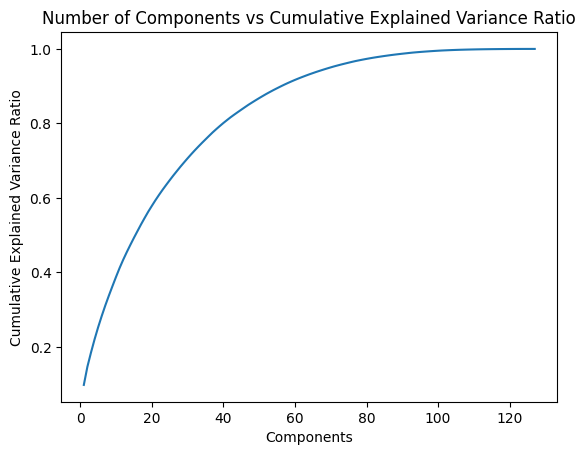

In [37]:
# plot the cumulative explained variance ratios
cum_evr_df = pd.DataFrame(cum_evr).set_index(0)
cum_evr_df.plot(title='Number of Components vs Cumulative Explained Variance Ratio',
                xlabel='Components',
                ylabel='Cumulative Explained Variance Ratio',
                legend=False)

### b. Update the model to have 50 components

In [38]:
# fit a TruncatedSVD model with 50 components
svd_50 = TruncatedSVD(n_components=50)
svd_50.fit(user_item_centered)

,n_components,50
,algorithm,'randomized'
,n_iter,5
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None
,tol,0.0


In [39]:
# view the cumulative explained variance ratios
sum(svd_50.explained_variance_ratio_)

np.float64(0.8678788517269054)

### c. Introduce a New User

In [49]:
# here's a new user
import numpy as np
import pandas as pd

# create a user-item matrix
restaurant_ratings = pd.read_excel('../Data/Restaurant_Ratings.xlsx')
X = restaurant_ratings.pivot(index='Consumer_ID', columns='Restaurant_Name', values='Overall_Rating').fillna(restaurant_ratings.Overall_Rating.mean())

# create a vector of NaN values
vector_length = X.shape[1]
new_user = np.full(vector_length, np.nan)

# populate with 2 ratings
ratings = [2, 2]
positions_to_populate = [40, 60]
new_user[positions_to_populate] = ratings

# view as a DataFrame
new_user_df = pd.DataFrame([new_user], columns=X.columns)
new_user_df

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# view only the restaurants that the new user rated
new_user_df.T.dropna()

,0
Restaurant_Name,
KFC,2.0
McDonalds Centro,2.0


In [51]:
# read in the restaurants details (second tab of spreadsheet)
restaurant_details = pd.read_excel('../Data/restaurant_ratings.xlsx', sheet_name=1)
restaurant_details.head()

,Restaurant_ID,Name,Cuisine,Price,Franchise
0,135069.0,Abondance Restaurante Bar,Bar,Low,No
1,135016.0,Arrachela Grill,NaN,Medium,No
2,132754.0,Cabana Huasteca,Mexican,Medium,No
3,132561.0,Cafe Ambar,NaN,Low,No
4,132572.0,Cafe Chaires,Cafeteria,Low,No


In [52]:
# the new user likes low-priced american chain restaurants
restaurant_details[restaurant_details.Name.isin(new_user_df.T.dropna().index)]

,Restaurant_ID,Name,Cuisine,Price,Franchise
40,132851.0,KFC,American,Low,Yes
60,132583.0,McDonalds Centro,American,Low,Yes


### d. Recommend Restaurants to the New User

In [53]:
restaurant_ratings['Overall_Rating'].mean()

np.float64(1.1998277347114557)

In [54]:
# apply the necessary data prep steps to the user

# fill nan values with the mean rating
new_user_fillna = new_user_df.fillna(restaurant_ratings['Overall_Rating'].mean())
# center the data
new_user_centered = new_user_fillna - new_user_fillna.mean()

In [57]:
new_user_centered.mean()

Restaurant_Name
Abondance Restaurante Bar         0.0
Arrachela Grill                   0.0
Cabana Huasteca                   0.0
Cafe Ambar                        0.0
Cafe Chaires                      0.0
                                 ... 
Tortas Hawaii                     0.0
Tortas Locas Hipocampo            0.0
Tortas Y Hamburguesas El Gordo    0.0
Unicol's Pizza                    0.0
Vips                              0.0
Length: 127, dtype: float64

In [58]:
# transform the user into the latent space
svd_50.transform(new_user_centered)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [17]:
# view the shape of the output


In [18]:
# reconstruct the user-item matrix for the user


In [19]:
# view the shape of the output


In [20]:
# make restaurant recommendations for the new user


In [21]:
# sort the recommendations


In [22]:
# exclude the restaurants the user already rated


In [23]:
# view the new recommended restaurants


In [24]:
# view the restaurant details dataframe


In [25]:
# combine the predicted ratings and restaurant details dataframes


In [26]:
# what are your thoughts on these recommendations?


## 3. Content-Based Filtering: Suggest Similar Restaurants to a Restaurant

### a. Prep the data to contain only numeric values

In [27]:
# turn the cuisine, price and franchise columns of the restaurant details data into numeric columns

# turn cuisine into dummy variables

# turn price into a numeric value

# turn franchise into an indicator


In [28]:
# combine them into a single dataframe


### b. Calculate the cosine similarities between rows

In [29]:
# calculate all the cosine similarities


In [30]:
# find the most similar restuarants to KFC


In [31]:
# find the details of those restaurants


In [32]:
# what are your thoughts on these recommendations?


## 4. Summarize Recommendations

In [33]:
# For the user who likes KFC and McDonalds, what are your top 10 restaurant recommendations?


In [34]:
# What are your thoughts on these recommendations and how could you improve your recommendations?


In [35]:
# For the KFC details page, what are the top 10 other restuarants that you would suggest?


In [36]:
# What are your thoughts on these suggestions and how could you improve your suggestions?
